# Listing 4.1 Frequency Tables

  Chol_Status  Frequency
0  Borderline       1861
1        High       1791
2   Desirable       1405


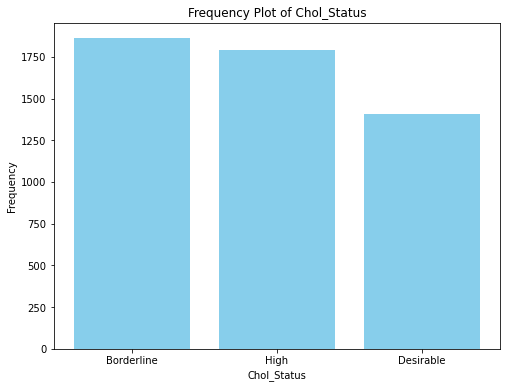

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

heart_df = pd.read_csv('../Datasets/Chapter 4/HEART.csv')
frequency_table = heart_df['Chol_Status'].value_counts().reset_index().rename(columns={'index': 'Chol_Status', 'Chol_Status': 'Frequency'})

# Sort the table by frequency
frequency_table = frequency_table.sort_values(by='Frequency', ascending=False)

# Print the frequency table
print(frequency_table)

# Plot the frequency
plt.figure(figsize=(8, 6))
plt.bar(frequency_table['Chol_Status'], frequency_table['Frequency'], color='skyblue')
plt.xlabel('Chol_Status')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Chol_Status')
plt.show()


# Listing 4.2 Summary Statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

past_elections_df = pd.read_excel('../Datasets/Chapter 4/Maine_Past_Elections.xlsx')
print(past_elections_df['D'].describe())
print(past_elections_df['R'].describe())
print(past_elections_df.isnull().sum())

count        15.000000
mean     267108.066667
std      100623.204581
min       62264.000000
25%      215913.500000
50%      243569.000000
75%      338843.000000
max      421923.000000
Name: D, dtype: float64
count        15.000000
mean     255776.733333
std       65083.494267
min      118701.000000
25%      221570.000000
50%      256458.000000
75%      301202.000000
max      336500.000000
Name: R, dtype: float64
Year    0
D       0
%       0
R       0
%.1     0
dtype: int64


## Listing 4.3 Coorelation Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cars_df = pd.read_excel('../Datasets/Chapter 4/CARS.xlsx')
print(cars_df.head())
print(cars_df.describe())

    Make            Model   Type Origin DriveTrain   MSRP  Invoice  \
0  Acura              MDX    SUV   Asia        All  36945    33337   
1  Acura   RSX Type S 2dr  Sedan   Asia      Front  23820    21761   
2  Acura          TSX 4dr  Sedan   Asia      Front  26990    24647   
3  Acura           TL 4dr  Sedan   Asia      Front  33195    30299   
4  Acura       3.5 RL 4dr  Sedan   Asia      Front  43755    39014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197  
              

Pearson correlation coefficients:
Weight    0.630796
Length    0.381554
dtype: float64


Text(0, 0.5, 'Horsepower')

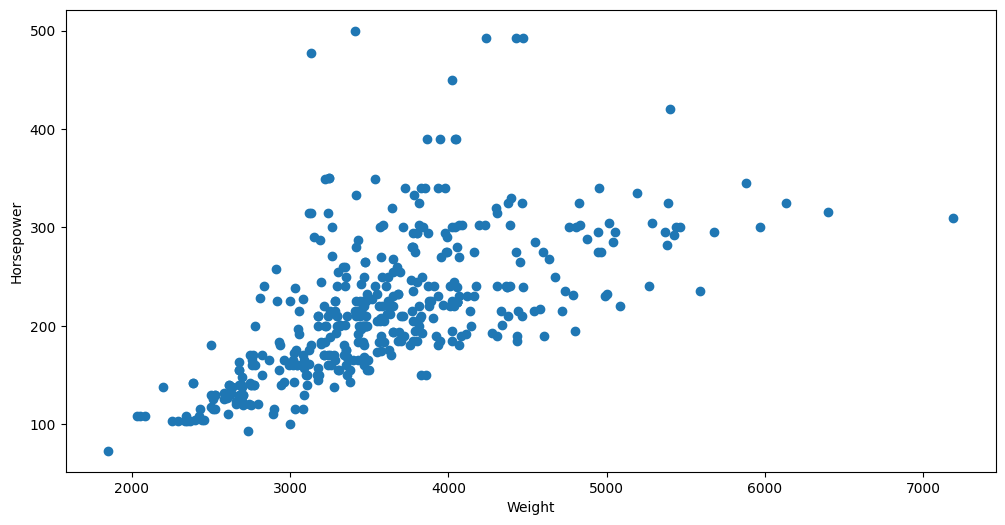

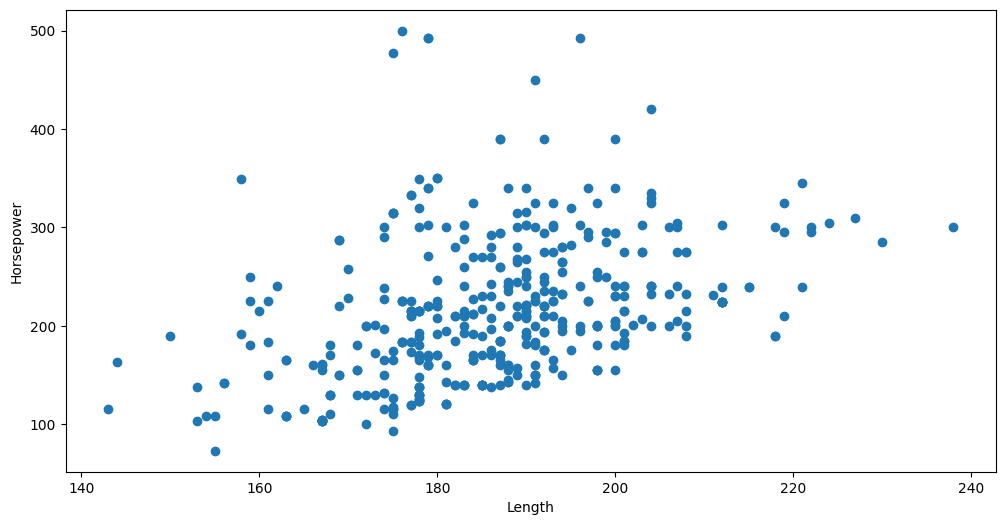

In [4]:
# Selecting variables
variables = cars_df[['Weight', 'Length', 'Horsepower']]

# Calculate the correlation matrix
correlation_matrix = variables[['Weight', 'Length']].corrwith(variables['Horsepower'])

print("Pearson correlation coefficients:")
print(correlation_matrix)

plt.figure(figsize=(12, 6))
plt.scatter(cars_df['Weight'], cars_df['Horsepower'])
plt.xlabel('Weight')
plt.ylabel('Horsepower')

plt.figure(figsize=(12, 6))
plt.scatter(cars_df['Length'], cars_df['Horsepower'])
plt.xlabel('Length')
plt.ylabel('Horsepower')

# Listing 4.4 Is the GDP correlated with Maine votertunout?

   year  voterturnout     gdp
0  2016          67.0  51.823
1  2012          67.2  50.106
2  2008          70.2  51.236
3  2004          72.0  51.351
4  2000          69.2  46.618
              year  voterturnout        gdp
count     5.000000      5.000000   5.000000
mean   2008.000000     69.120000  50.226800
std       6.324555      2.100476   2.113539
min    2000.000000     67.000000  46.618000
25%    2004.000000     67.200000  50.106000
50%    2008.000000     69.200000  51.236000
75%    2012.000000     70.200000  51.351000
max    2016.000000     72.000000  51.823000
Pearson correlation coefficient between GDP and Voter Turnout: 0.04994549957956506


Text(0, 0.5, 'voterturnout')

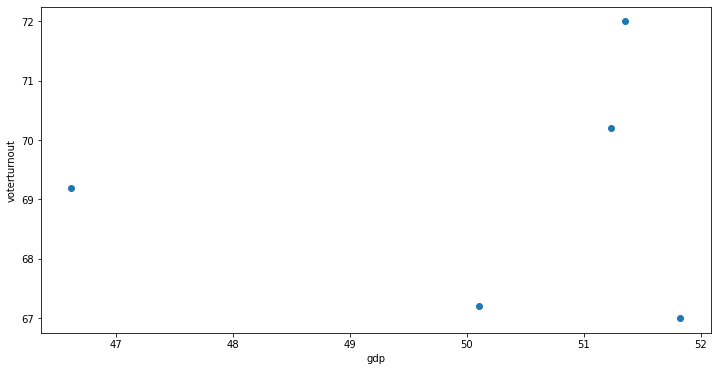

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


correlation = pd.read_excel('../Datasets/Chapter 4/correlation.xlsx')
print(correlation.head())
print(correlation.describe())

# Calculate the correlation matrix
correlation_coefficient = correlation['gdp'].corr(correlation['voterturnout'])

#print("Pearson correlation coefficients:")
print("Pearson correlation coefficient between GDP and Voter Turnout:", correlation_coefficient)

plt.figure(figsize=(12, 6))
plt.scatter(correlation['gdp'], correlation['voterturnout'])
plt.xlabel('gdp')
plt.ylabel('voterturnout')

# T-Test

# Listing 4.5 One-Sample T-tests

In [1]:
import pandas as pd
from scipy import stats

maine_votes_df = pd.read_excel('../Datasets/Chapter 4/MaineVotesDR.xlsx')

# Test for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(maine_votes_df['Result'])
print("Shapiro-Wilk Test:")
print(shapiro_test)

# t-test
t_stat, p_value = stats.ttest_1samp(maine_votes_df['Result'], 0)
print("\nT-test:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Shapiro-Wilk Test:
ShapiroResult(statistic=0.6303409337997437, pvalue=4.9036381824407727e-05)

T-test:
T-statistic: 4.58257569495584
P-value: 0.0004263757573432252


# Listing 4.6.1 Two-Sample T-tests

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/megasatish/class-data

class_df = pd.read_csv('../Datasets/Chapter 4/Class.csv')

# Test for normality by Gender
print("Shapiro Normality Test by Gender:")
for Gender in class_df['Gender'].unique():
    stat, p_value = stats.shapiro(class_df[class_df['Gender'] == Gender]['Height'])
    print(f"Gender: {Gender}, Statistic: {stat:.2f}, p-value: {p_value:.4f}")

# t-test by Gender
# Assuming you're comparing males to females
male_heights = class_df[class_df['Gender'] == 'M']['Height']
female_heights = class_df[class_df['Gender'] == 'F']['Height']
t_stat, p_value = stats.ttest_ind(male_heights, female_heights)
print(f"\nT-test between male and female Heights:")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")


Shapiro Normality Test by Gender:
Gender: M, Statistic: 0.95, p-value: 0.7249
Gender: F, Statistic: 0.93, p-value: 0.4932

T-test between male and female Heights:
T-statistic: 1.45, p-value: 0.1645


# Listing 4.6.2 Visualizing the Height of each Gender

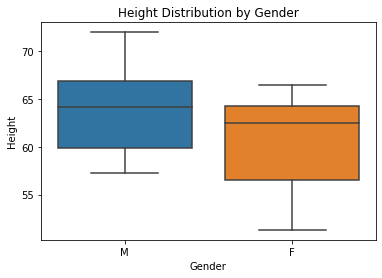

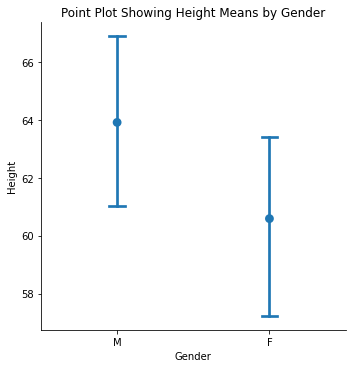

In [5]:

# Visualizing the Height distribution by Gender
sns.boxplot(x='Gender', y='Height', data=class_df)
plt.title('Height Distribution by Gender')
plt.show()

# For t-test plots, let's use seaborn to show the distribution of heights by Gender,
# highlighting the means and confidence intervals
sns.catplot(x='Gender', y='Height', kind="point", data=class_df, join=False, capsize=.1)
plt.title('Point Plot Showing Height Means by Gender')
plt.show()

